In [19]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", sep=';', encoding = "ISO-8859-1")

In [20]:
def DrawPoints(coord1, coord2, First, Last):
    X=df[coord1]
    Y=df[coord2]
    i=First
    #print (len(df))
    #while i<=100:
    #while i<=len(df):
    while i <= Last:
        plt.scatter(df[coord1][i], df[coord2][i], color="blue")
        i+=1
    plt.show()

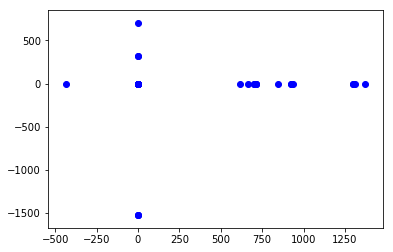

done


In [21]:
#DrawPoint('X13', 'X14')
DrawPoints('X13', 'X14', 1, 100)#just testing
print ("done")

In [55]:
def PrintParams(Prob, Real, First, Last, NeedPrint):
    ProbArray=df[Prob]
    TrueArray=df[Real]
    i = First
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    #print (ProbArray[1])
    while i <= Last:
        if ProbArray[i] >= 0.5:#╤ä╤Ç╨╛╨┤ ╤ü ╤é╨╛╤ç╨║╨╕ ╨╖╤Ç╨╡╨╜╨╕╤Å ╤ü╨╕╤ü╤é╨╡╨╝╤ï
            if TrueArray[i] == "F":
                #plt.scatter(x, y, color="red")#true negative
                tn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], " ", TrueArray[i], " tn")
            if TrueArray[i] == "G":
                #plt.scatter(x, y, color="orange")#false positive
                fp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], " ", TrueArray[i], " fp")
        else:#╨╗╨╡╨│╨╕╤é╨╕╨╝╨╜╨░╤Å ╤ü ╤é╨╛╤ç╨║╨╕ ╨╖╤Ç╨╡╨╜╨╕╤Å ╤ü╨╕╤ü╤é╨╡╨╝╤ï
            if TrueArray[i] == "F":
                #plt.scatter(x, y, color="blue")#false negative
                fn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], " ", TrueArray[i], " fn")
            if TrueArray[i] == "G":
                #plt.scatter(x, y, color="green")#true positive
                tp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], " ", TrueArray[i], " tp")
        i+=1
    print("Summary:")
    print ("true positive", tp)
    print ("true negative", tn)
    print ("false positive", fp)
    print ("false negative", fn)

In [112]:
print("From p1_Fraud:")
PrintParams('p1_Fraud', 'CLASS', 1, 100, 1)
print("\nFrom p5_Fraud:")
PrintParams('p5_Fraud', 'CLASS', 1, len(df)-1, 0)

From p1_Fraud:
0.1233   G  tp
0.0433   G  tp
0.28   G  tp
0.3117   G  tp
0.1758   G  tp
0.345   F  fn
0.1242   G  tp
0.0642   G  tp
0.0758   G  tp
0.0733   G  tp
0.275   G  tp
0.0542   G  tp
0.0717   G  tp
0.085   G  tp
0.306   F  fn
0.163   F  fn
0.391   F  fn
0.01   G  tp
0.0333   G  tp
0.473   G  tp
0.3675   F  fn
0.575   G  fp
0.641   G  fp
0.641   G  fp
0.065   G  tp
0.0642   G  tp
0.185   F  fn
0.614   G  fp
0.0242   G  tp
0.075   G  tp
0.36   G  tp
0.3442   G  tp
0.32   G  tp
0.277   F  fn
0.135   G  tp
0.0308   G  tp
0.0317   G  tp
0.0992   F  fn
0.456   F  fn
0.1683   G  tp
0.0092   G  tp
0.0542   G  tp
0.659   F  tn
0.2917   G  tp
0.0683   G  tp
0.686   F  tn
0.1617   G  tp
0.2825   G  tp
0.695   F  tn
0.38   G  tp
0.0492   G  tp
0.395   G  tp
0.649   G  fp
0.474   F  fn
0.21   G  tp
0.691   F  tn
0.29   G  tp
0.065   G  tp
0.0717   G  tp
0.695   F  tn
0.2967   G  tp
0.22   F  fn
0.678   G  fp
0.603   G  fp
0.667   G  fp
0.0942   G  tp
0.1008   G  tp
0.065   G  tp
0.3783   G 

In [68]:
def CalcFP(Prob, Real, First, Last, Border):#false positive probability (fraud: P>=Border)
    ProbArray=df[Prob]
    TrueArray=df[Real]
    All=Last-First+1
    FPC=0
    i=First
    while i<=Last:
        if ProbArray[i] >= Border and TrueArray[i] == "G":
            FPC+=1
        i+=1
    #print (FPC, " ", All);
    return FPC/All

In [69]:
print(CalcFP('p1_Fraud', 'CLASS', 1, 100, 0.5))

0.14


In [106]:
def CalcBorder (Prob, Real, First, Last, MaxFP):#calculate Border (false positive <= MaxFP)
    Border=0
    Incr=0.1
    while CalcFP(Prob, Real, First, Last, Border) > MaxFP:
        if Border+Incr == 1:
            Incr/=10
        Border+=Incr
    return Border

In [108]:
print(CalcFP('p1_Fraud', 'CLASS', 1, 100, 0))
print(CalcBorder('p1_Fraud', 'CLASS', 1, 100, 0.2))#false positive <= 0.2

0.78
0.4


In [113]:
def CalcFN(Prob, Real, First, Last, Border):#false negative probability (fraud: P>=Border)
    ProbArray=df[Prob]
    TrueArray=df[Real]
    All=Last-First+1
    FNC=0
    i=First
    while i<=Last:
        if ProbArray[i] < Border and TrueArray[i] == "F":
            FNC+=1
        i+=1
    #print (FNC, " ", All);
    return FNC/All

def CalcTP(Prob, Real, First, Last, Border):#true positive probability (fraud: P>=Border)
    ProbArray=df[Prob]
    TrueArray=df[Real]
    All=Last-First+1
    TPC=0
    i=First
    while i<=Last:
        if ProbArray[i] < Border and TrueArray[i] == "G":
            TPC+=1
        i+=1
    #print (TPC, " ", All);
    return TPC/All

def CalcRecall (Prob, Real, First, Last, Border):#calculate recall
    TP = CalcTP(Prob, Real, First, Last, Border)
    FN = CalcFN(Prob, Real, First, Last, Border)
    Recall = TP/(TP+FN)
    return Recall

def CalcPrecision (Prob, Real, First, Last, Border):#calculate precision
    TP = CalcTP(Prob, Real, First, Last, Border)
    FP = CalcFP(Prob, Real, First, Last, Border)
    Precision = TP/(TP+FP)
    return Precision    

In [115]:
print("False positive: ", CalcFP('p1_Fraud', 'CLASS', 1, 100, 0.5))
print("False negative: ", CalcFN('p1_Fraud', 'CLASS', 1, 100, 0.5))
print("True positive: ", CalcTP('p1_Fraud', 'CLASS', 1, 100, 0.5))
print("Recall: ", CalcRecall('p1_Fraud', 'CLASS', 1, 100, 0.5))
print("Precision: ", CalcPrecision('p1_Fraud', 'CLASS', 1, 100, 0.5))

False positive:  0.14
False negative:  0.13
True positive:  0.64
Recall:  0.8311688311688311
Precision:  0.8205128205128205
